## Iteration Notebook
#### This notebook contains the iterations of our first model. The goal of this project was to build a predictive linear regression model. The target variable for our first model was Sale Price and our predictor variable was total square footage of living. You can see the methods we used to remove outliers, scale the data, and checking the assumptions in the 'mc_fsm.ipynb' notebook. Here I will begin iterating over that model and attempt feature engineering to see if we can improve our first model.

### The claims we're trying to address with our model are:
#### 1.) Having higher square footage increases home sale price.
#### 2.) Having a porch increases home sale price.
#### 3.) Having a beachfront or lakefront increases home sale price.
#### 4.) The presence of a nuisance (power lines, traffic noise, airport noise) decreases home sale price.

### Importing the necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split
%matplotlib inline
%load_ext autoreload
%autoreload 2
import os
import sys
module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)

#### I am going to include all of the possible variables in this dataframe to see if there are any features that we may have missed the first time around.

In [4]:
import src.jw_total_df as jw
df = jw.create_dataframe()

#### This dataframe has already been manipulated to not include the records that have a zero for sale price. You can find this in the jw_total_df.py file located in the src folder 

In [12]:
df.shape

(29961, 152)

In [94]:
df.corr()['SalePrice'].sort_values(ascending=False)[:30]

SalePrice             1.000000
BldgGrade             0.246312
SqFtTotLiving         0.245807
NbrLivingUnits        0.183809
LakeWashington        0.180161
SqFt1stFloor          0.177734
SqFt2ndFloor          0.161102
HBUAsIfVacant         0.152119
BathFullCount         0.151338
TidelandShoreland     0.149521
SqFtOpenPorch         0.124655
Territorial           0.123391
SaleReason            0.121727
Bedrooms              0.120940
BldgGradeVar          0.118038
Stories               0.111256
SqFtGarageAttached    0.108975
SqFtFinBasement       0.089767
BathHalfCount         0.087803
Township              0.087469
WfntLocation          0.086750
has_porch             0.084885
SqFtTotBasement       0.079278
Bath3qtrCount         0.077968
SeattleSkyline        0.073274
Olympics              0.065150
FinBasementGrade      0.063306
LakeSammamish         0.062780
AddnlCost             0.062443
WfntBank              0.058735
Name: SalePrice, dtype: float64

#### These variables are the variables in the dataframe that show a correlation to sale price. They have been listed in order with Building grade having the highest correlation. The 'has_porch' column was created by checking to see if a property did or did not have a porch. If sqft open porch or sqft enclosed porch was greater than 1, if it was, it is represented with the value 1 for True. If not, it is represented with a 0 for False.

In [202]:
model_df = df[['SalePrice',           
'BldgGrade',            
'SqFtTotLiving',        
'NbrLivingUnits',       
'LakeWashington',              
'BathFullCount',        
'TidelandShoreland',    
'SqFtOpenPorch',                  
'Bedrooms',                                          
'BathHalfCount',        
'Township',
'WfntLocation',
'has_porch',               
'PowerLines',
'TrafficNoise',
'OtherNuisances']]

In [106]:
model_df.shape

(29961, 16)

### Removing the same outliers as we did for the first model to help make the sale price distribution more normal.

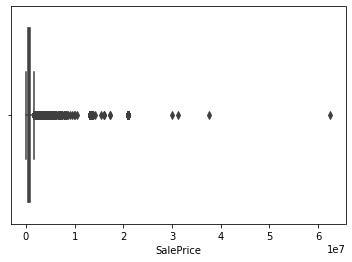

In [95]:
sns.boxplot(df['SalePrice'])

#### Removing the five outliers that were above 20 million, as shown in the boxplot above. Also creating a dataframe to be used for the model.

In [116]:
model_df = model_df[model_df['SalePrice'] < 20000000]

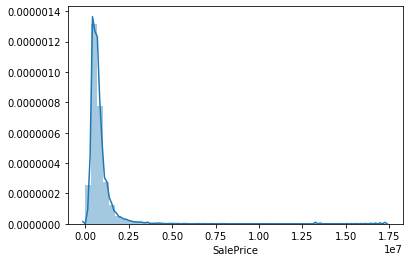

In [17]:
sns.distplot(model_df['SalePrice'])

This made the saleprice distribution more normal than it was with the sale prices above 20 million.

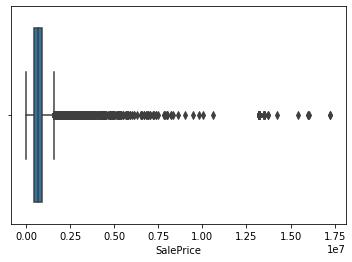

In [18]:
sns.boxplot(model_df['SalePrice'])

#### There are only 538 sale records with sale prices under 150 thousand and only 527 sale records that are greater than 275 thousand. I am going to try removing these to get an even more normal distribution for sale price.

In [42]:
sum(model_df['SalePrice']<150000)

538

In [43]:
sum(model_df['SalePrice'] > 2750000)

527

In [203]:
model_df = model_df[model_df['SalePrice'] > 150000]

In [45]:
model_df.shape

(29346, 152)

There are 3,324 sale records that have a sale price above 1.3 million, more than I would like to lose but I am going to try removing them to see if it normalizes the distribution any more.

In [46]:
sum(model_df['SalePrice'] > 1300000)

3324

In [204]:
model_df = model_df[model_df['SalePrice'] < 1300000]

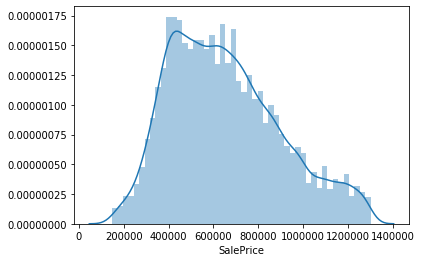

In [48]:
sns.distplot(model_df['SalePrice'])

This definitely made the distribution more normal. There is still a bump in sale prices between 1.2 and 1.4 million though.

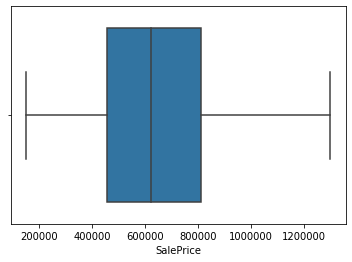

In [33]:
sns.boxplot(model_df['SalePrice'])

Since total sqft of living space was used as our predictor variable in our first model, I will include it in this model iteration and attempt to add more features as well perform some feature engineering.

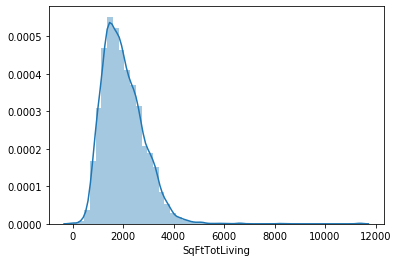

In [34]:
sns.distplot(model_df['SqFtTotLiving'])

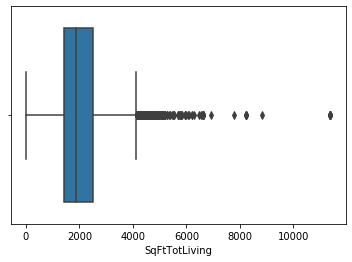

In [35]:
sns.boxplot(model_df['SqFtTotLiving'])

There are a few outliers that may need to be removed, specifically over 8 thousand and 10 thousand sqft.

In [50]:
sum(model_df['SqFtTotLiving'] > 6000)

36

There are only 36 records with the sqft of total living under 6,000 sqft, I am going to try removing those for now.

In [205]:
model_df = model_df[model_df['SqFtTotLiving'] < 6000]

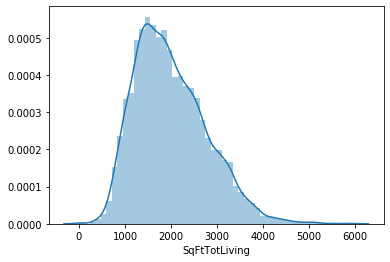

In [53]:
sns.distplot(model_df['SqFtTotLiving'])

It looks like there is still a bump in the tail around 4 thousand sqft, let's check how many records that is.

In [206]:
model_df.shape

(25893, 16)

In [54]:
sum(model_df['SqFtTotLiving'] > 4000)

318

There is only 318 records with a total sqft living space under 4 thousand sqft. Our dataframe currently has 25,893 records, I do not think it will skew our results too much if these records are removed.

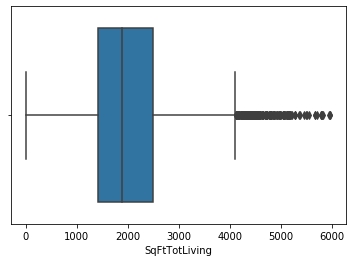

In [56]:
sns.boxplot(model_df['SqFtTotLiving'])

In [207]:
model_df = model_df[model_df['SqFtTotLiving'] < 4000]

In [121]:
model_df.shape

(25568, 16)

#### Our model dataframe now has 25,568 records to work with.

## Time to get to some iterations!

First, I am going to try adding building grade as a feature to our model along with sqft of total living as our predictor variables for the target sale price. I am adding building grade to try and improve our model's accuracy, I will fit the model to address our claims once we have improved the accuracy.

In [112]:
model4_df = model_df[['SalePrice', 'SqFtTotLiving', 'BldgGrade']]
formula = 'SalePrice~SqFtTotLiving+BldgGrade'
model4 = smf.ols(formula=formula, data=model4_df).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.302
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     5520.
Date:                Sat, 20 Jun 2020   Prob (F-statistic):               0.00
Time:                        13:01:03   Log-Likelihood:            -3.4900e+05
No. Observations:               25568   AIC:                         6.980e+05
Df Residuals:                   25565   BIC:                         6.980e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -2.199e+05   1.08e+04    -20.418      0.000   -2.41e+05   -1.99e+05
SqFtTotLiving    76.2834      2.262     33.719      0.000      71.849      80.718
BldgGrade      9.585e+04   1726.904     55.505      0.000    9.25e+04    9.92e+04
==============================================================================
Omnibus:                      899.393   Durbin-Watson:                   1.922
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              996.071
Skew:                           0.477   Prob(JB):                    5.08e-217
Kurtosis:                       3.163   Cond. No.                     1.78e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.78e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Let's check the assumptions starting with linearity

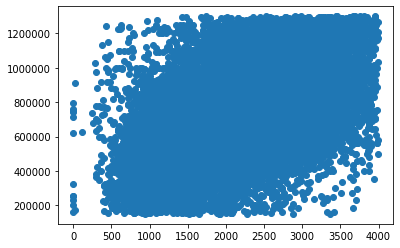

In [60]:
plt.scatter(model_df['SqFtTotLiving'], model_df['SalePrice'])

It looks like there is a small amount of a linear relationship but I believe it is still save to say we are violating this assumption.

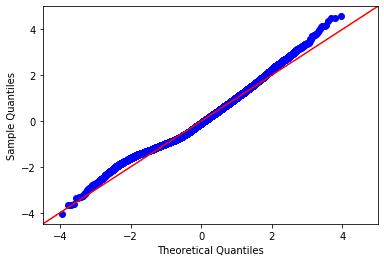

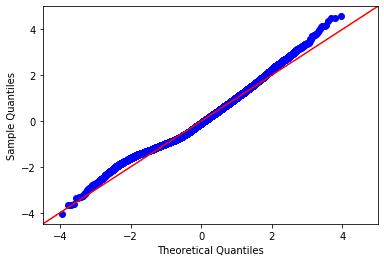

In [61]:
sm.graphics.qqplot(model4.resid, dist=stats.norm, line='45', fit=True)

Looking at this Q-Q plot, the residuals look to be mostly normally distributed. Let's double check with JB test.

In [68]:
jarque_test = stats.jarque_bera(model4.resid)
print('Model JB score:'+str(jarque_test[0]))

Model JB score:996.071386431739


#### This jb score of 996.07 shows that the residuals are not normally distributed.
Now to check Homoscedasticity

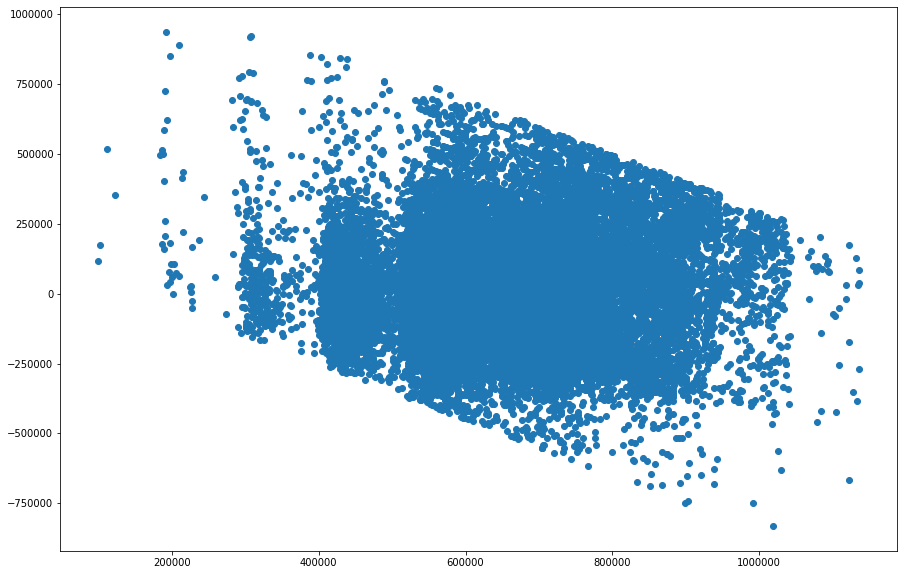

In [136]:
y_hat = model4.predict()
fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(y_hat, model4.resid)

These datapoints are not randomly distributed, so we are violating this assumption as well.

### Let's check the independence assuption next.

With our condition number being 1.78e+04, which is way above 30, we can indicate that there is strong multicollinearity, violating the independence assumption.

In [122]:
model_df

,SalePrice,BldgGrade,SqFtTotLiving,NbrLivingUnits,LakeWashington,BathFullCount,TidelandShoreland,SqFtOpenPorch,Bedrooms,BathHalfCount,Township,WfntLocation,has_porch,PowerLines,TrafficNoise,OtherNuisances
0,560000,7,1930,1,0,2,0,180,3,0,26,0,1,N,0,N
1,435000,7,1975,1,0,1,0,45,3,0,22,0,1,N,0,N
2,550000,8,1560,1,0,1,0,0,2,1,25,0,0,N,0,N
3,409950,7,1850,1,0,2,0,0,3,1,23,0,0,N,0,N
4,380000,7,1750,1,0,1,0,670,4,1,21,0,1,N,0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43860,700988,8,2790,1,0,2,0,70,5,0,23,0,1,N,0,N
43862,930000,8,2600,1,0,2,0,0,3,0,24,0,0,N,0,N
43863,850000,8,2220,1,0,2,0,40,3,1,24,0,1,N,0,N
43864,686000,7,1910,2,0,1,0,80,4,0,24,0,1,N,2,N


### Let's check for multicollinearity of the variables in our dataframe.

In [127]:
corr_df = model_df.corr().abs().stack().reset_index().sort_values(0, ascending=False)
corr_df['pairs'] = list(zip(corr_df.level_0, corr_df.level_1))
corr_df.set_index(['pairs'], inplace=True)
corr_df.drop(columns=['level_1', 'level_0'], inplace=True)
corr_df.columns = ['cc']
corr_df.drop_duplicates(inplace=True)
corr_df[(corr_df.cc>.5) & (corr_df.cc<1)]

,cc
pairs,
"(Bedrooms, SqFtTotLiving)",0.651643
"(BldgGrade, SqFtTotLiving)",0.634667
"(has_porch, SqFtOpenPorch)",0.610387
"(SqFtTotLiving, BathFullCount)",0.548074
"(BldgGrade, SalePrice)",0.520143
"(SalePrice, Township)",0.513427


#### Now that we know which variables in our dataframe that show a multicollinearity of .5 or higher, we can choose which ones need to be removed.

In [208]:
model_df.drop(columns=['Bedrooms', 'SqFtOpenPorch'], inplace=True)

### Let's try another iteration of our model with 'has_porch' as a feature along with 'sqft of total living'.

In [132]:
model5_df = model_df[['SalePrice', 'SqFtTotLiving', 'has_porch']]
formula = 'SalePrice~SqFtTotLiving+has_porch'
model5 = smf.ols(formula=formula, data=model5_df).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                     3567.
Date:                Sat, 20 Jun 2020   Prob (F-statistic):               0.00
Time:                        13:10:57   Log-Likelihood:            -3.5045e+05
No. Observations:               25568   AIC:                         7.009e+05
Df Residuals:                   25565   BIC:                         7.009e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      3.406e+05   3894.095     87.469      0.000    3.33e+05    3.48e+05
SqFtTotLiving   153.1088      1.940     78.912      0.000     149.306     156.912
has_porch      1.396e+04   2848.708      4.899      0.000    8372.326    1.95e+04
==============================================================================
Omnibus:                      823.465   Durbin-Watson:                   1.908
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              866.382
Skew:                           0.433   Prob(JB):                    7.37e-189
Kurtosis:                       2.746   Cond. No.                     6.04e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.04e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### It looks like our r-squared went down more than I wanted, let's see about the assumptions

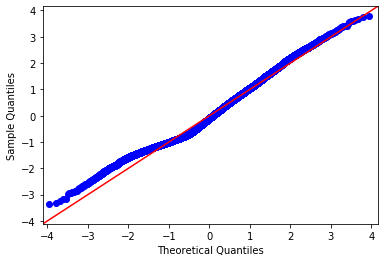

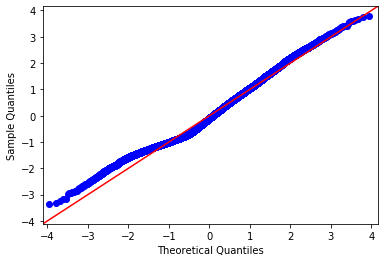

In [133]:
sm.graphics.qqplot(model5.resid, dist=stats.norm, line='45', fit=True)

In [134]:
jarque_test = stats.jarque_bera(model5.resid)
print(jarque_test)

(866.3815162575722, 0.0)


The normality here looks better than the previous model's and our JB score went down a from 996 to 866.

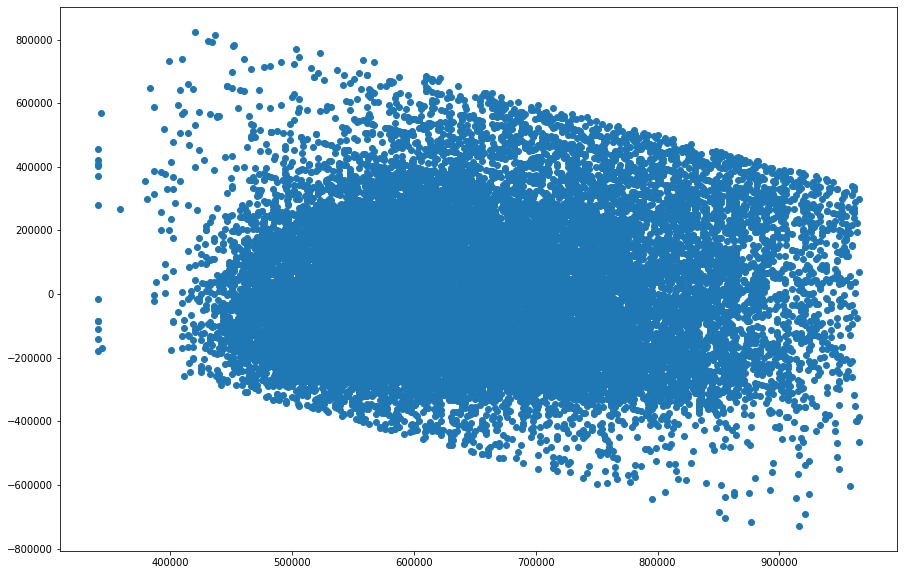

In [135]:
y_hat = model5.predict()
fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(y_hat, model5.resid)


This looks pretty similar to the previous model, we are still violating the homoscedasticity assumption.

### I am going to try encoding the categorical columns in the model dataframe to see how this affects the model's accuracy.

In [147]:
def dummify(df, column_names):
    '''This function was created by Joel, it takes in a dataframe
    and the specified column names to encode. Then encodes the columns
    passed in with pandas get dummies and returns a new dataframe with
    encoded columns concatenated with the continuous variable columns in 
    the dataframe.'''
    dataframes = []
    copy_df = df.copy()
    for column in column_names:
        new_df = pd.get_dummies(df[column], drop_first=True)
        new_df.columns = [column + '_' + str(name) for name in new_df]
        dataframes.append(new_df)
        copy_df.drop(column, axis = 1, inplace = True)
    new_df = pd.concat(dataframes, axis=1)
    return pd.concat([copy_df, new_df], axis = 1)

In [148]:
np.array(model_df.columns)

array(['SalePrice', 'BldgGrade', 'SqFtTotLiving', 'NbrLivingUnits',
       'LakeWashington', 'BathFullCount', 'TidelandShoreland',
       'BathHalfCount', 'Township', 'WfntLocation', 'has_porch',
       'PowerLines', 'TrafficNoise', 'OtherNuisances'], dtype=object)

In [211]:
model_df_encoded = dummify(model_df, ['BldgGrade',
                                      'NbrLivingUnits',
                                      'LakeWashington',
                                      'BathFullCount',
                                      'TidelandShoreland',
                                      'BathHalfCount',
                                      'Township',
                                      'WfntLocation',
                                      'has_porch',
                                      'PowerLines',
                                      'TrafficNoise',
                                      'OtherNuisances'])

In [152]:
y = model_df_encoded['SalePrice']
X = model_df_encoded.drop(['SalePrice'], axis=1)
model6 = sm.OLS(y, X).fit()
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.960
Model:                            OLS   Adj. R-squared (uncentered):              0.960
Method:                 Least Squares   F-statistic:                          1.267e+04
Date:                Sat, 20 Jun 2020   Prob (F-statistic):                        0.00
Time:                        13:33:11   Log-Likelihood:                     -3.3910e+05
No. Observations:               25568   AIC:                                  6.783e+05
Df Residuals:                   25520   BIC:                                  6.787e+05
Df Model:                          48                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
SqFtTotLiving         132.3057      1.767     74.881      0.000     128.843     135.769
BldgGrade_4            1.1e+05   5.76e+04      1.910      0.056   -2906.973    2.23e+05
BldgGrade_5          5.331e+04   5.35e+04      0.997      0.319   -5.15e+04    1.58e+05
BldgGrade_6          1.185e+04    5.3e+04      0.223      0.823   -9.21e+04    1.16e+05
BldgGrade_7          4.868e+04    5.3e+04      0.919      0.358   -5.52e+04    1.53e+05
BldgGrade_8          1.007e+05    5.3e+04      1.898      0.058   -3300.432    2.05e+05
BldgGrade_9          1.876e+05   5.31e+04      3.531      0.000    8.35e+04    2.92e+05
BldgGrade_10         2.437e+05   5.35e+04      4.558      0.000    1.39e+05    3.49e+05
BldgGrade_11         2.987e+05   5.82e+04      5.134      0.000    1.85e+05    4.13e+05
NbrLivingUnits_2     1.443e+04   8826.603      1.634      0.102   -2875.471    3.17e+04
NbrLivingUnits_3     6684.8035   1.86e+04      0.360      0.719   -2.97e+04    4.31e+04
LakeWashington_1     5.122e+04   1.26e+04      4.057      0.000    2.65e+04     7.6e+04
LakeWashington_2     7.958e+04   1.43e+04      5.570      0.000    5.16e+04    1.08e+05
LakeWashington_3     1.198e+05   1.87e+04      6.410      0.000    8.32e+04    1.56e+05
LakeWashington_4     1.389e+05   3.87e+04      3.592      0.000    6.31e+04    2.15e+05
BathFullCount_1     -2385.5997   7040.023     -0.339      0.735   -1.62e+04    1.14e+04
BathFullCount_2     -4914.9312   7214.254     -0.681      0.496   -1.91e+04    9225.417
BathFullCount_3     -5836.5499   8118.879     -0.719      0.472   -2.18e+04    1.01e+04
BathFullCount_4     -1.844e+04   1.67e+04     -1.105      0.269   -5.11e+04    1.43e+04
BathFullCount_5      1.091e+05   9.88e+04      1.103      0.270   -8.46e+04    3.03e+05
TidelandShoreland_1  2.443e+05    1.4e+05      1.741      0.082   -3.07e+04    5.19e+05
TidelandShoreland_2  2.011e+05   1.53e+05      1.318      0.187   -9.79e+04       5e+05
TidelandShoreland_3 -3.735e+04   1.39e+05     -0.268      0.789    -3.1e+05    2.36e+05
BathHalfCount_1     -1.507e+04   1936.786     -7.783      0.000   -1.89e+04   -1.13e+04
BathHalfCount_2      7693.6138   1.11e+04      0.693      0.489   -1.41e+04    2.95e+04
BathHalfCount_3      6.326e+04   4.72e+04      1.341      0.180   -2.92e+04    1.56e+05
BathHalfCount_4     -5.542e+05    1.4e+05     -3.969      0.000   -8.28e+05    -2.8e+05
Township_20           1.18e+05   5.33e+04      2.215      0.027    1.36e+04    2.23e+05
Township_21           8.76e+04    5.3e+04      1.654      0.098   -1.62e+04    1.91e+05
Township_22          1.329e+05   5.29e+04      2.512      0.012    2.92e+04    2.37e+05
Township_23           2.09e+05   5.29e+04      3.948      0.000    1.05e+05    3

### This r-squared seems incredible but way too good to be true at the same time, let's check the assumptions and multicollinearity

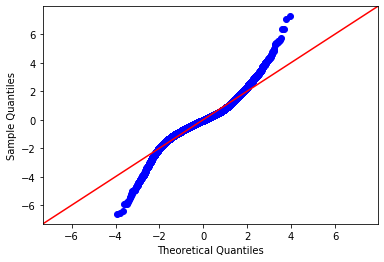

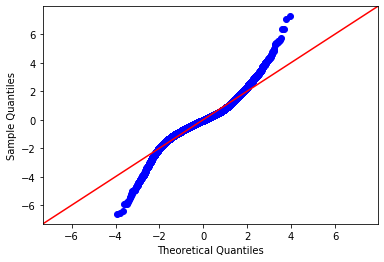

In [157]:
sm.graphics.qqplot(model6.resid, dist=stats.norm, line='45', fit=True)

The distribution seems to have gotten worse in terms of normality. Our JB score increased quite a bit as it should have with this many features.

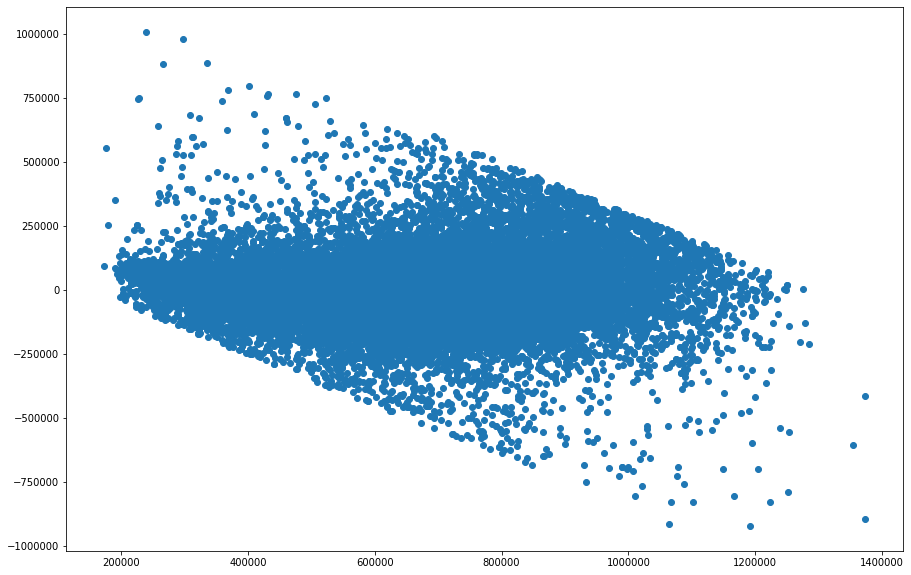

In [158]:
y_hat = model6.predict()
fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(y_hat, model6.resid)

#### We are still violating the homoscedasticity assumption, these data points are not randomly distributed.

### Are condition number of 8.98e+05 shows that there is strong multicollinearity between our features. Let's see which ones we should remove.

In [212]:
model_df_encoded.drop(columns=['BathFullCount_2', 'WfntLocation_3', 'LakeWashington_4', 'BldgGrade_8'], axis=1, inplace=True)

In [167]:
corr_df = model_df_encoded.corr().abs().stack().reset_index().sort_values(0, ascending=False)
corr_df['pairs'] = list(zip(corr_df.level_0, corr_df.level_1))
corr_df.set_index(['pairs'], inplace=True)
corr_df.drop(columns=['level_1', 'level_0'], inplace=True)
corr_df.columns = ['cc']
corr_df.drop_duplicates(inplace=True)
corr_df[(corr_df.cc>.4) & (corr_df.cc<1)]

,cc
pairs,
"(BathFullCount_1, SqFtTotLiving)",0.485734
"(SqFtTotLiving, SalePrice)",0.466314


#### These are the features that show a correlation between each other greater than .5, let's remove a few and see if our model's accuracy improves.

In [178]:
y = model_df_encoded['SalePrice']
X = model_df_encoded.drop(['SalePrice'], axis=1)
model7 = sm.OLS(y, X).fit()
model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.960
Model:                            OLS   Adj. R-squared (uncentered):              0.960
Method:                 Least Squares   F-statistic:                          1.382e+04
Date:                Sat, 20 Jun 2020   Prob (F-statistic):                        0.00
Time:                        14:13:13   Log-Likelihood:                     -3.3910e+05
No. Observations:               25568   AIC:                                  6.783e+05
Df Residuals:                   25524   BIC:                                  6.787e+05
Df Model:                          44                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
SqFtTotLiving         132.4679      1.745     75.910      0.000     129.047     135.888
BldgGrade_4          1.267e+04   2.33e+04      0.545      0.586   -3.29e+04    5.82e+04
BldgGrade_5         -4.642e+04   8170.084     -5.682      0.000   -6.24e+04   -3.04e+04
BldgGrade_6         -8.854e+04   3680.402    -24.058      0.000   -9.58e+04   -8.13e+04
BldgGrade_7         -5.187e+04   2251.406    -23.037      0.000   -5.63e+04   -4.75e+04
BldgGrade_9          8.692e+04   3128.874     27.781      0.000    8.08e+04    9.31e+04
BldgGrade_10         1.428e+05   6364.813     22.437      0.000     1.3e+05    1.55e+05
BldgGrade_11         1.977e+05   2.37e+04      8.341      0.000    1.51e+05    2.44e+05
NbrLivingUnits_2      1.42e+04   8825.821      1.608      0.108   -3103.610    3.15e+04
NbrLivingUnits_3     6484.4788   1.86e+04      0.349      0.727   -2.99e+04    4.29e+04
LakeWashington_1     5.114e+04   1.26e+04      4.050      0.000    2.64e+04    7.59e+04
LakeWashington_2     7.948e+04   1.43e+04      5.561      0.000    5.15e+04    1.07e+05
LakeWashington_3     1.198e+05   1.87e+04      6.408      0.000    8.31e+04    1.56e+05
BathFullCount_1      2438.8586   2079.099      1.173      0.241   -1636.295    6514.012
BathFullCount_3      -981.5235   4010.902     -0.245      0.807   -8843.120    6880.073
BathFullCount_4     -1.378e+04   1.51e+04     -0.915      0.360   -4.33e+04    1.57e+04
BathFullCount_5      1.135e+05   9.86e+04      1.151      0.250   -7.97e+04    3.07e+05
TidelandShoreland_1  3.022e+05   5.28e+04      5.727      0.000    1.99e+05    4.06e+05
TidelandShoreland_2   2.67e+05   1.91e+04     14.006      0.000     2.3e+05    3.04e+05
TidelandShoreland_3 -3.715e+04   1.39e+05     -0.267      0.790    -3.1e+05    2.36e+05
BathHalfCount_1      -1.51e+04   1936.175     -7.799      0.000   -1.89e+04   -1.13e+04
BathHalfCount_2      7668.5494   1.11e+04      0.690      0.490   -1.41e+04    2.94e+04
BathHalfCount_3      6.299e+04   4.72e+04      1.335      0.182   -2.95e+04    1.55e+05
BathHalfCount_4     -5.496e+05   1.39e+05     -3.940      0.000   -8.23e+05   -2.76e+05
Township_20          2.134e+05   8020.236     26.609      0.000    1.98e+05    2.29e+05
Township_21           1.83e+05   5199.579     35.193      0.000    1.73e+05    1.93e+05
Township_22          2.283e+05   5141.006     44.402      0.000    2.18e+05    2.38e+05
Township_23          3.046e+05   5108.413     59.622      0.000    2.95e+05    3.15e+05
Township_24          4.956e+05   4773.383    103.816      0.000    4.86e+05    5.05e+05
Township_25          6.233e+05   4635.591    134.463      0.000    6.14e+05    6.32e+05
Township_26          4.709e+05   4895.513     96.195      0.000    4.61e+05    4

#### Dropping those features improved our condition number but it is still pretty high, showing strong multicollinearity. Let's try dropping a few more while leaving sqft of total living, has porch, and sale price since these variables are needed to address the claims we have chosen.

In [175]:
corr_df = model_df_encoded.corr().abs().stack().reset_index().sort_values(0, ascending=False)
corr_df['pairs'] = list(zip(corr_df.level_0, corr_df.level_1))
corr_df.set_index(['pairs'], inplace=True)
corr_df.drop(columns=['level_1', 'level_0'], inplace=True)
corr_df.columns = ['cc']
corr_df.drop_duplicates(inplace=True)
corr_df[(corr_df.cc>.3) & (corr_df.cc<1)]

,cc
pairs,
"(BathFullCount_1, SqFtTotLiving)",0.485734
"(SqFtTotLiving, SalePrice)",0.466314
"(SalePrice, Township_25)",0.392805
"(TidelandShoreland_2, WfntLocation_6)",0.385903
"(BldgGrade_9, SqFtTotLiving)",0.356327
"(SqFtTotLiving, BldgGrade_6)",0.355297
"(SalePrice, BldgGrade_9)",0.331932
"(SalePrice, Township_21)",0.314218
"(SqFtTotLiving, has_porch_1)",0.301820


In [213]:
model_df_encoded.drop(columns=['BathFullCount_1', 'TidelandShoreland_2', 'BldgGrade_9', 'BldgGrade_6'], axis=1, inplace=True)

In [181]:
y = model_df_encoded['SalePrice']
X = model_df_encoded.drop(['SalePrice'], axis=1)
model8 = sm.OLS(y, X).fit()
model8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.957
Model:                            OLS   Adj. R-squared (uncentered):              0.957
Method:                 Least Squares   F-statistic:                          1.424e+04
Date:                Sat, 20 Jun 2020   Prob (F-statistic):                        0.00
Time:                        14:14:06   Log-Likelihood:                     -3.3990e+05
No. Observations:               25568   AIC:                                  6.799e+05
Df Residuals:                   25528   BIC:                                  6.802e+05
Df Model:                          40                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
SqFtTotLiving         161.7504      1.512    106.989      0.000     158.787     164.714
BldgGrade_4          8.191e+04   2.38e+04      3.436      0.001    3.52e+04    1.29e+05
BldgGrade_5           -43.1852   8184.230     -0.005      0.996   -1.61e+04     1.6e+04
BldgGrade_7         -3.702e+04   1967.374    -18.816      0.000   -4.09e+04   -3.32e+04
BldgGrade_10          1.07e+05   6456.005     16.573      0.000    9.43e+04     1.2e+05
BldgGrade_11         1.529e+05   2.44e+04      6.262      0.000    1.05e+05    2.01e+05
NbrLivingUnits_2    -8483.3011   9027.510     -0.940      0.347   -2.62e+04    9211.133
NbrLivingUnits_3    -3.175e+04   1.91e+04     -1.661      0.097   -6.92e+04    5723.470
LakeWashington_1     5.616e+04    1.3e+04      4.312      0.000    3.06e+04    8.17e+04
LakeWashington_2     8.024e+04   1.47e+04      5.443      0.000    5.13e+04    1.09e+05
LakeWashington_3      1.19e+05   1.93e+04      6.174      0.000    8.12e+04    1.57e+05
BathFullCount_3       372.3481   4090.001      0.091      0.927   -7644.287    8388.983
BathFullCount_4     -3253.1785   1.55e+04     -0.210      0.834   -3.37e+04    2.72e+04
BathFullCount_5      1.115e+05   1.02e+05      1.096      0.273   -8.78e+04    3.11e+05
TidelandShoreland_1  3.001e+05   5.44e+04      5.514      0.000    1.93e+05    4.07e+05
TidelandShoreland_3 -2.579e+04   1.44e+05     -0.179      0.858   -3.08e+05    2.56e+05
BathHalfCount_1     -2220.1540   1935.825     -1.147      0.251   -6014.482    1574.174
BathHalfCount_2      1.557e+04   1.15e+04      1.359      0.174   -6885.435     3.8e+04
BathHalfCount_3      4.901e+04   4.87e+04      1.007      0.314   -4.64e+04    1.44e+05
BathHalfCount_4     -5.015e+05   1.44e+05     -3.485      0.000   -7.84e+05   -2.19e+05
Township_20          1.361e+05   7551.875     18.018      0.000    1.21e+05    1.51e+05
Township_21          1.099e+05   4182.813     26.285      0.000    1.02e+05    1.18e+05
Township_22          1.563e+05   4121.848     37.910      0.000    1.48e+05    1.64e+05
Township_23          2.295e+05   3903.056     58.809      0.000    2.22e+05    2.37e+05
Township_24           4.31e+05   3651.315    118.034      0.000    4.24e+05    4.38e+05
Township_25          5.692e+05   3666.286    155.265      0.000    5.62e+05    5.76e+05
Township_26          4.042e+05   3826.350    105.649      0.000    3.97e+05    4.12e+05
WfntLocation_1       7.645e+04    7.2e+04      1.062      0.288   -6.47e+04    2.18e+05
WfntLocation_4       1.799e+05   1.44e+05      1.251      0.211   -1.02e+05    4.62e+05
WfntLocation_5      -1.402e+05   1.02e+05     -1.377      0.169    -3.4e+05    5.94e+04
WfntLocation_6       3.277e+05   4.55e+04      7.203      0.000    2.38e+05    4

### Let's see if the model meets any of the assumptions.

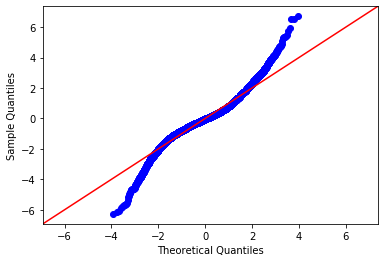

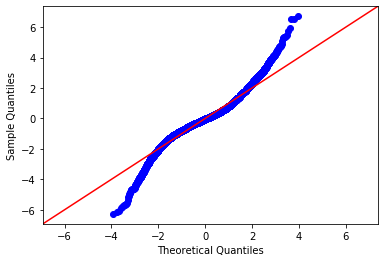

In [182]:
sm.graphics.qqplot(model8.resid, dist=stats.norm, line='45', fit=True)

Definitely improving from the previous iteration but still violating the normality assumption.

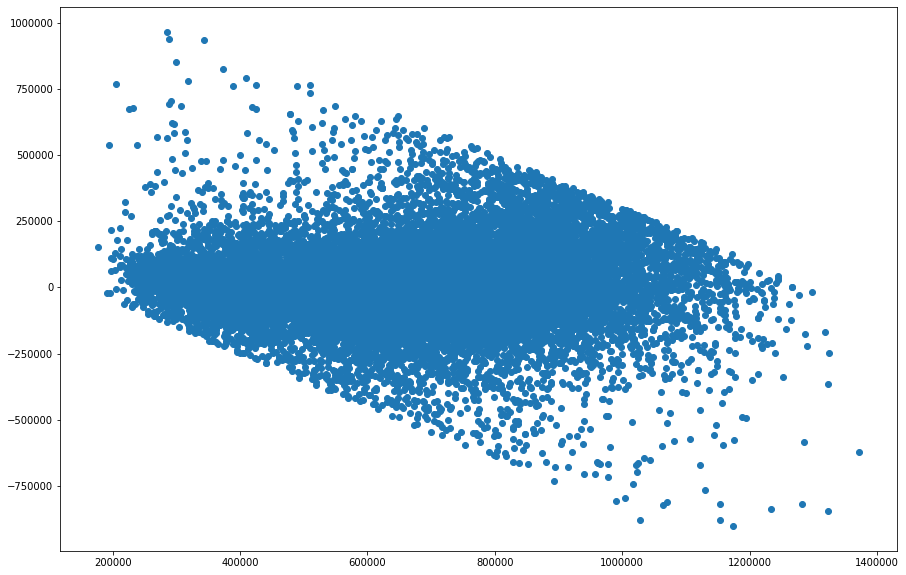

In [184]:
y_hat = model8.predict()
fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(y_hat, model8.resid)

This does not look too different from our previous check on homoscedasticity, still violating the assumption.

In [185]:
corr_df = model_df_encoded.corr().abs().stack().reset_index().sort_values(0, ascending=False)
corr_df['pairs'] = list(zip(corr_df.level_0, corr_df.level_1))
corr_df.set_index(['pairs'], inplace=True)
corr_df.drop(columns=['level_1', 'level_0'], inplace=True)
corr_df.columns = ['cc']
corr_df.drop_duplicates(inplace=True)
corr_df[(corr_df.cc>.3) & (corr_df.cc<1)]

,cc
pairs,
"(SqFtTotLiving, SalePrice)",0.466314
"(Township_25, SalePrice)",0.392805
"(Township_21, SalePrice)",0.314218
"(has_porch_1, SqFtTotLiving)",0.301820


Since the model is still showing strong multicollinearity, we still need to remove some features. I am not removing sale price or sqft of total living since these variables are needed to address the claims we have chosen.

In [214]:
model_df_encoded.drop(columns=['Township_25', 'Township_21'], axis=1, inplace=True)

In [187]:
y = model_df_encoded['SalePrice']
X = model_df_encoded.drop(['SalePrice'], axis=1)
model9 = sm.OLS(y, X).fit()
model9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.903
Model:                            OLS   Adj. R-squared (uncentered):              0.903
Method:                 Least Squares   F-statistic:                              6234.
Date:                Sat, 20 Jun 2020   Prob (F-statistic):                        0.00
Time:                        14:22:23   Log-Likelihood:                     -3.5037e+05
No. Observations:               25568   AIC:                                  7.008e+05
Df Residuals:                   25530   BIC:                                  7.011e+05
Df Model:                          38                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
SqFtTotLiving         278.8943      1.520    183.517      0.000     275.916     281.873
BldgGrade_4          2.869e+05   3.58e+04      8.021      0.000    2.17e+05    3.57e+05
BldgGrade_5          1.644e+05    1.2e+04     13.672      0.000    1.41e+05    1.88e+05
BldgGrade_7          5.616e+04   2642.504     21.252      0.000     5.1e+04    6.13e+04
BldgGrade_10         5.526e+04   9655.950      5.723      0.000    3.63e+04    7.42e+04
BldgGrade_11         1109.3952   3.67e+04      0.030      0.976   -7.09e+04    7.31e+04
NbrLivingUnits_2     1.763e+04   1.36e+04      1.297      0.195   -9015.770    4.43e+04
NbrLivingUnits_3     2775.8536   2.88e+04      0.096      0.923   -5.36e+04    5.92e+04
LakeWashington_1     6.884e+04   1.96e+04      3.511      0.000    3.04e+04    1.07e+05
LakeWashington_2     6.303e+04   2.22e+04      2.840      0.005    1.95e+04    1.07e+05
LakeWashington_3     1.159e+05    2.9e+04      3.994      0.000     5.9e+04    1.73e+05
BathFullCount_3     -6.319e+04   6101.307    -10.357      0.000   -7.52e+04   -5.12e+04
BathFullCount_4     -1.325e+05   2.33e+04     -5.683      0.000   -1.78e+05   -8.68e+04
BathFullCount_5     -7.042e+04   1.53e+05     -0.460      0.646   -3.71e+05     2.3e+05
TidelandShoreland_1  2.983e+05    8.2e+04      3.639      0.000    1.38e+05    4.59e+05
TidelandShoreland_3 -1.339e+05   2.17e+05     -0.618      0.536   -5.58e+05     2.9e+05
BathHalfCount_1      1.085e+04   2903.394      3.737      0.000    5158.298    1.65e+04
BathHalfCount_2      -3.28e+04   1.72e+04     -1.902      0.057   -6.66e+04    1007.857
BathHalfCount_3      6052.0211   7.33e+04      0.083      0.934   -1.38e+05     1.5e+05
BathHalfCount_4     -7.726e+05   2.17e+05     -3.566      0.000    -1.2e+06   -3.48e+05
Township_20         -1.828e+05   1.04e+04    -17.569      0.000   -2.03e+05   -1.62e+05
Township_22         -1.492e+05   4381.070    -34.063      0.000   -1.58e+05   -1.41e+05
Township_23         -6.951e+04   4075.962    -17.054      0.000   -7.75e+04   -6.15e+04
Township_24          1.456e+05   3759.294     38.731      0.000    1.38e+05    1.53e+05
Township_26           1.02e+05   3881.038     26.273      0.000    9.44e+04     1.1e+05
WfntLocation_1       1.297e+05   1.08e+05      1.196      0.232   -8.29e+04    3.42e+05
WfntLocation_4        4.33e+05   2.17e+05      1.999      0.046    8405.491    8.58e+05
WfntLocation_5       1.896e+05   1.53e+05      1.237      0.216   -1.11e+05     4.9e+05
WfntLocation_6       3.387e+05   6.85e+04      4.943      0.000    2.04e+05    4.73e+05
WfntLocation_7       2.364e+05   1.53e+05      1.544      0.123   -6.38e+04    5.37e+05
WfntLocation_8       7.311e+04   2.21e+04      3.309      0.001    2.98e+04    1

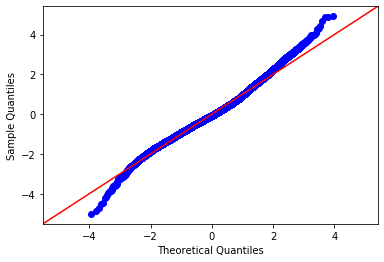

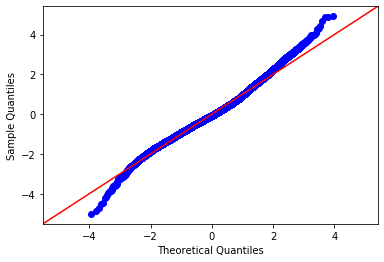

In [189]:
sm.graphics.qqplot(model9.resid, dist=stats.norm, line='45', fit=True)

#### The model is still violating the normality assumption but this is the lowest JB score we've gotten since the addition of multpile features. (small win for me)

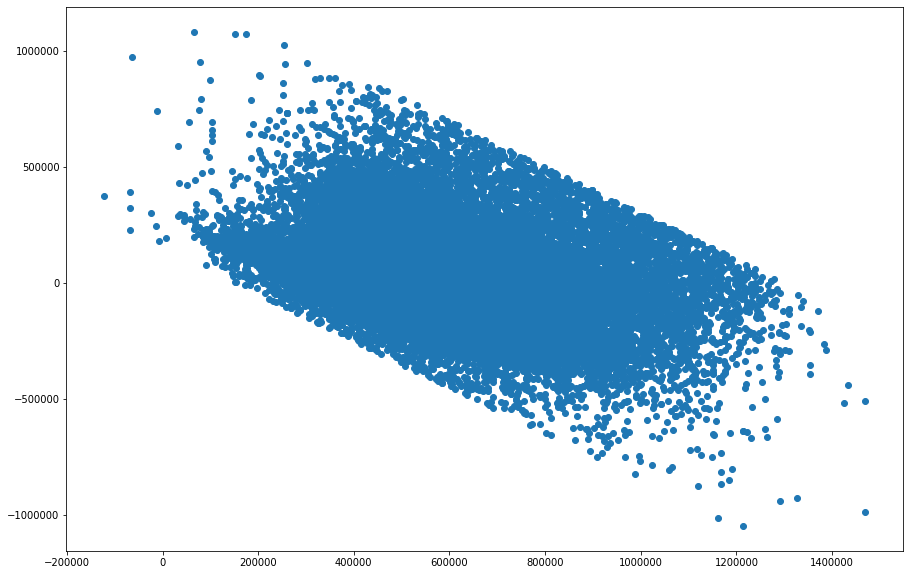

In [190]:
y_hat = model9.predict()
fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(y_hat, model9.resid)

Still violating the homoscedasticity assumption as well

In [194]:
corr_df = model_df_encoded.corr().abs().stack().reset_index().sort_values(0, ascending=False)
corr_df['pairs'] = list(zip(corr_df.level_0, corr_df.level_1))
corr_df.set_index(['pairs'], inplace=True)
corr_df.drop(columns=['level_1', 'level_0'], inplace=True)
corr_df.columns = ['corrcoeff']
corr_df.drop_duplicates(inplace=True)
corr_df[(corr_df.corrcoeff>.2) & (corr_df.corrcoeff<1)]

,corrcoeff
pairs,
"(SqFtTotLiving, SalePrice)",0.466314
"(has_porch_1, SqFtTotLiving)",0.301820
"(SqFtTotLiving, BathFullCount_3)",0.283330
"(SqFtTotLiving, BldgGrade_7)",0.274257
"(SalePrice, Township_22)",0.272669
"(SqFtTotLiving, BathHalfCount_1)",0.268135
"(SalePrice, BldgGrade_7)",0.249221
"(Township_26, Township_24)",0.237591
"(SqFtTotLiving, BldgGrade_10)",0.232123


### Let's try dropping a few more features to try and improve the amount of high multicollinearity.

In [215]:
model_df_encoded.drop(columns=['BathFullCount_3', 'BldgGrade_7', 'Township_22', 'BathHalfCount_1', 'Township_24'], axis=1, inplace=True)

In [196]:
y = model_df_encoded['SalePrice']
X = model_df_encoded.drop(['SalePrice'], axis=1)
model10 = sm.OLS(y, X).fit()
model10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.886
Model:                            OLS   Adj. R-squared (uncentered):              0.886
Method:                 Least Squares   F-statistic:                              6010.
Date:                Sat, 20 Jun 2020   Prob (F-statistic):                        0.00
Time:                        14:34:38   Log-Likelihood:                     -3.5241e+05
No. Observations:               25568   AIC:                                  7.049e+05
Df Residuals:                   25535   BIC:                                  7.051e+05
Df Model:                          33                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
SqFtTotLiving         287.4325      1.231    233.502      0.000     285.020     289.845
BldgGrade_4           2.91e+05   3.87e+04      7.524      0.000    2.15e+05    3.67e+05
BldgGrade_5          1.483e+05   1.29e+04     11.467      0.000    1.23e+05    1.74e+05
BldgGrade_10         6.516e+04   1.04e+04      6.293      0.000    4.49e+04    8.55e+04
BldgGrade_11          919.7704   3.97e+04      0.023      0.982    -7.7e+04    7.88e+04
NbrLivingUnits_2     4.322e+04   1.47e+04      2.948      0.003    1.45e+04     7.2e+04
NbrLivingUnits_3    -1.068e+04   3.08e+04     -0.347      0.729   -7.11e+04    4.97e+04
LakeWashington_1      1.12e+05   2.12e+04      5.280      0.000    7.04e+04    1.54e+05
LakeWashington_2     1.022e+05    2.4e+04      4.255      0.000    5.51e+04    1.49e+05
LakeWashington_3     1.342e+05   3.14e+04      4.271      0.000    7.26e+04    1.96e+05
BathFullCount_4     -1.601e+05   2.52e+04     -6.364      0.000   -2.09e+05   -1.11e+05
BathFullCount_5     -4.193e+04   1.66e+05     -0.253      0.800   -3.67e+05    2.83e+05
TidelandShoreland_1  1.805e+05   8.87e+04      2.035      0.042    6628.993    3.54e+05
TidelandShoreland_3  -1.38e+05   2.34e+05     -0.589      0.556   -5.97e+05    3.21e+05
BathHalfCount_2     -3.087e+04   1.86e+04     -1.660      0.097   -6.73e+04    5573.008
BathHalfCount_3      -2.46e+04   7.94e+04     -0.310      0.757    -1.8e+05    1.31e+05
BathHalfCount_4     -8.218e+05   2.35e+05     -3.503      0.000   -1.28e+06   -3.62e+05
Township_20         -1.771e+05   1.11e+04    -15.983      0.000   -1.99e+05   -1.55e+05
Township_23         -7.142e+04   4049.497    -17.637      0.000   -7.94e+04   -6.35e+04
Township_26           1.02e+05   3824.384     26.680      0.000    9.45e+04     1.1e+05
WfntLocation_1       1.357e+05   1.17e+05      1.156      0.248   -9.45e+04    3.66e+05
WfntLocation_4        3.99e+05   2.35e+05      1.701      0.089   -6.06e+04    8.59e+05
WfntLocation_5       1.669e+05   1.66e+05      1.006      0.315   -1.58e+05    4.92e+05
WfntLocation_6       3.867e+05   7.42e+04      5.215      0.000    2.41e+05    5.32e+05
WfntLocation_7       2.052e+05   1.66e+05      1.238      0.216    -1.2e+05     5.3e+05
WfntLocation_8        4.66e+04   2.39e+04      1.949      0.051    -256.486    9.35e+04
WfntLocation_9        1.83e+04   2.74e+04      0.668      0.504   -3.54e+04     7.2e+04
has_porch_1           4.18e+04   3084.422     13.553      0.000    3.58e+04    4.79e+04
PowerLines_Y         -5.98e+04   1.45e+04     -4.135      0.000   -8.81e+04   -3.15e+04
TrafficNoise_1       8.744e+04   5243.459     16.676      0.000    7.72e+04    9.77e+04
TrafficNoise_2       1.066e+05   6809.905     15.654      0.000    9.33e+04     

### We're getting close! Let's check the assumptions

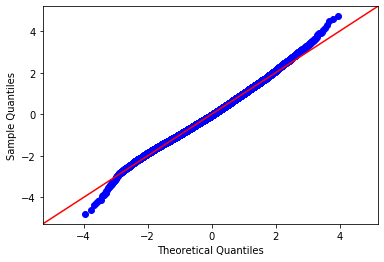

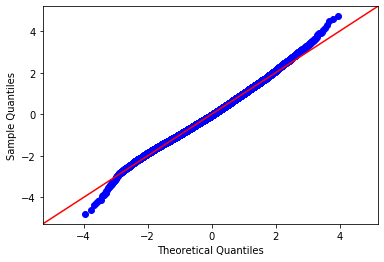

In [197]:
sm.graphics.qqplot(model10.resid, dist=stats.norm, line='45', fit=True)

We still have a jb score of 221.8 but that's quite a bit better than our previous model iteration with a jb score of 1132.1

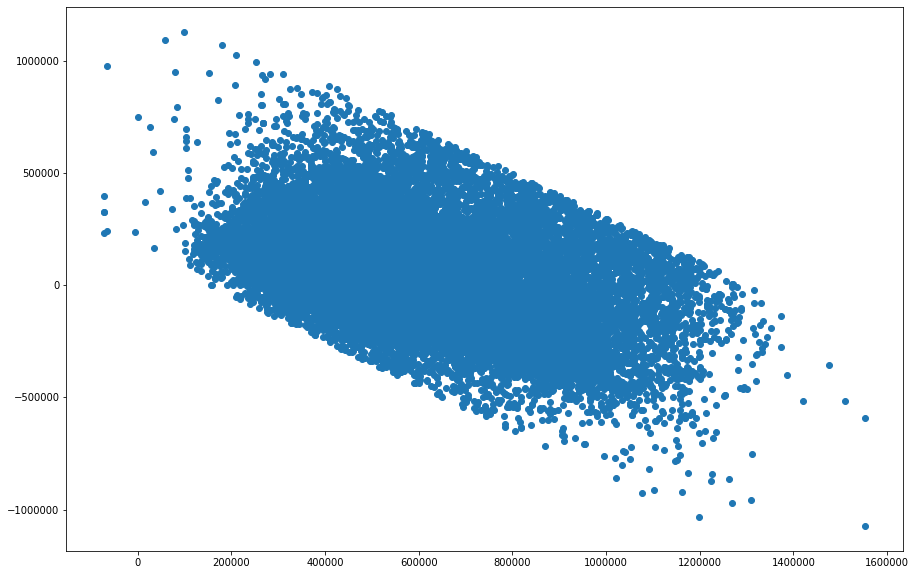

In [198]:
y_hat = model10.predict()
fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(y_hat, model10.resid)

The homoscedasticity assumption doesn't seem to improving at all.

In [199]:
corr_df = model_df_encoded.corr().abs().stack().reset_index().sort_values(0, ascending=False)
corr_df['pairs'] = list(zip(corr_df.level_0, corr_df.level_1))
corr_df.set_index(['pairs'], inplace=True)
corr_df.drop(columns=['level_1', 'level_0'], inplace=True)
corr_df.columns = ['corrcoeff']
corr_df.drop_duplicates(inplace=True)
corr_df[(corr_df.corrcoeff>.2) & (corr_df.corrcoeff<1)]

,corrcoeff
pairs,
"(SqFtTotLiving, SalePrice)",0.466314
"(has_porch_1, SqFtTotLiving)",0.301820
"(SqFtTotLiving, BldgGrade_10)",0.232123
"(BldgGrade_10, SalePrice)",0.214395
"(Township_26, Township_23)",0.212147


Removing those features seems to have raised our jb score and lowered our r-squared

### Now that we have our dataframe in a place without a crazy high jb or low r-squared, I am going to create a new dataframe to address the claim, 'Having a porch increases home sale price.' I am going to drop the sqft of total living in this dataframe to see if it affects the accuracy of the model. I don't think we  necessarily need it to address this specific claim.

In [216]:
porch_df = model_df_encoded

In [217]:
corr_df = porch_df.corr().abs().stack().reset_index().sort_values(0, ascending=False)
corr_df['pairs'] = list(zip(corr_df.level_0, corr_df.level_1))
corr_df.set_index(['pairs'], inplace=True)
corr_df.drop(columns=['level_1', 'level_0'], inplace=True)
corr_df.columns = ['corrcoeff']
corr_df.drop_duplicates(inplace=True)
corr_df[(corr_df.corrcoeff>.2) & (corr_df.corrcoeff<1)]

,corrcoeff
pairs,
"(SqFtTotLiving, SalePrice)",0.466314
"(has_porch_1, SqFtTotLiving)",0.301820
"(SqFtTotLiving, BldgGrade_10)",0.232123
"(BldgGrade_10, SalePrice)",0.214395
"(Township_26, Township_23)",0.212147


In [219]:
porch_df.drop(columns=['SqFtTotLiving'], axis=1, inplace=True)

In [220]:
y = porch_df['SalePrice']
X = porch_df.drop(['SalePrice'], axis=1)
model10 = sm.OLS(y, X).fit()
model10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.642
Model:                            OLS   Adj. R-squared (uncentered):              0.642
Method:                 Least Squares   F-statistic:                              1433.
Date:                Sat, 20 Jun 2020   Prob (F-statistic):                        0.00
Time:                        14:49:56   Log-Likelihood:                     -3.6702e+05
No. Observations:               25568   AIC:                                  7.341e+05
Df Residuals:                   25536   BIC:                                  7.344e+05
Df Model:                          32                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
BldgGrade_4          1.333e+05   6.85e+04      1.947      0.052    -920.107    2.68e+05
BldgGrade_5          1071.2719   2.29e+04      0.047      0.963   -4.38e+04    4.59e+04
BldgGrade_10         4.872e+05   1.81e+04     26.993      0.000    4.52e+05    5.23e+05
BldgGrade_11         5.212e+05   7.02e+04      7.420      0.000    3.84e+05    6.59e+05
NbrLivingUnits_2     2.447e+05   2.59e+04      9.441      0.000    1.94e+05    2.95e+05
NbrLivingUnits_3      3.44e+05   5.45e+04      6.311      0.000    2.37e+05    4.51e+05
LakeWashington_1     3.139e+05   3.75e+04      8.366      0.000     2.4e+05    3.87e+05
LakeWashington_2     3.622e+05   4.25e+04      8.528      0.000    2.79e+05    4.45e+05
LakeWashington_3      2.71e+05   5.56e+04      4.872      0.000    1.62e+05     3.8e+05
BathFullCount_4      1.596e+05   4.45e+04      3.588      0.000    7.24e+04    2.47e+05
BathFullCount_5      2.642e+05   2.94e+05      0.900      0.368   -3.11e+05     8.4e+05
TidelandShoreland_1  3.641e+05   1.57e+05      2.318      0.020    5.63e+04    6.72e+05
TidelandShoreland_3   3.65e+05   4.15e+05      0.879      0.379   -4.49e+05    1.18e+06
BathHalfCount_2      2.178e+05   3.29e+04      6.627      0.000    1.53e+05    2.82e+05
BathHalfCount_3       1.42e+05   1.41e+05      1.010      0.312   -1.33e+05    4.17e+05
BathHalfCount_4     -6.925e+05   4.15e+05     -1.667      0.095   -1.51e+06    1.22e+05
Township_20          4.779e+04   1.95e+04      2.445      0.014    9481.037    8.61e+04
Township_23          2.109e+05   6842.990     30.825      0.000    1.98e+05    2.24e+05
Township_26           4.13e+05   6347.633     65.068      0.000    4.01e+05    4.25e+05
WfntLocation_1      -7.363e+04   2.08e+05     -0.354      0.723   -4.81e+05    3.34e+05
WfntLocation_4       7.329e+05   4.15e+05      1.765      0.078    -8.1e+04    1.55e+06
WfntLocation_5       4.995e+04   2.94e+05      0.170      0.865   -5.26e+05    6.26e+05
WfntLocation_6       3.316e+05   1.31e+05      2.525      0.012    7.42e+04    5.89e+05
WfntLocation_7       7.036e+05   2.94e+05      2.397      0.017    1.28e+05    1.28e+06
WfntLocation_8       3.302e+05   4.23e+04      7.811      0.000    2.47e+05    4.13e+05
WfntLocation_9       1.473e+05   4.85e+04      3.039      0.002    5.23e+04    2.42e+05
has_porch_1          5.169e+05   4104.345    125.948      0.000    5.09e+05    5.25e+05
PowerLines_Y         1.406e+05   2.56e+04      5.499      0.000    9.05e+04    1.91e+05
TrafficNoise_1       2.548e+05   9197.058     27.702      0.000    2.37e+05    2.73e+05
TrafficNoise_2       2.671e+05    1.2e+04     22.265      0.000    2.44e+05    2.91e+05
TrafficNoise_3       2.852e+05   2.95e+04      9.682      0.000    2.27e+05    3

In [227]:
sm.stats.diagnostic.linear_rainbow(model10)
rainbow_statistic, rainbow_pvalue = sm.stats.diagnostic.linear_rainbow(model10)
print('rainbow_statistic:'+str(rainbow_statistic))
print('rainbow_pvalue:'+str(rainbow_pvalue))

rainbow_statistic:1.0040602671788623
rainbow_pvalue:0.4094584520205275


### With a pvalue of .41 we are not violating the linearity assumption! 

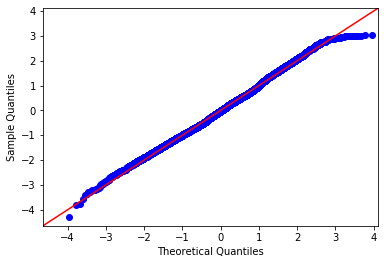

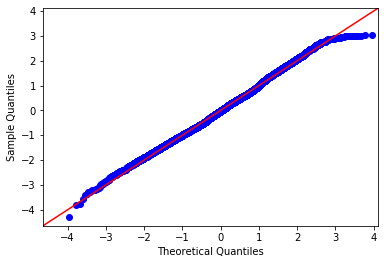

In [221]:
sm.graphics.qqplot(model10.resid, dist=stats.norm, line='45', fit=True)

#### The normality assumption visually looks to be normally distributed except for the right tail at the top

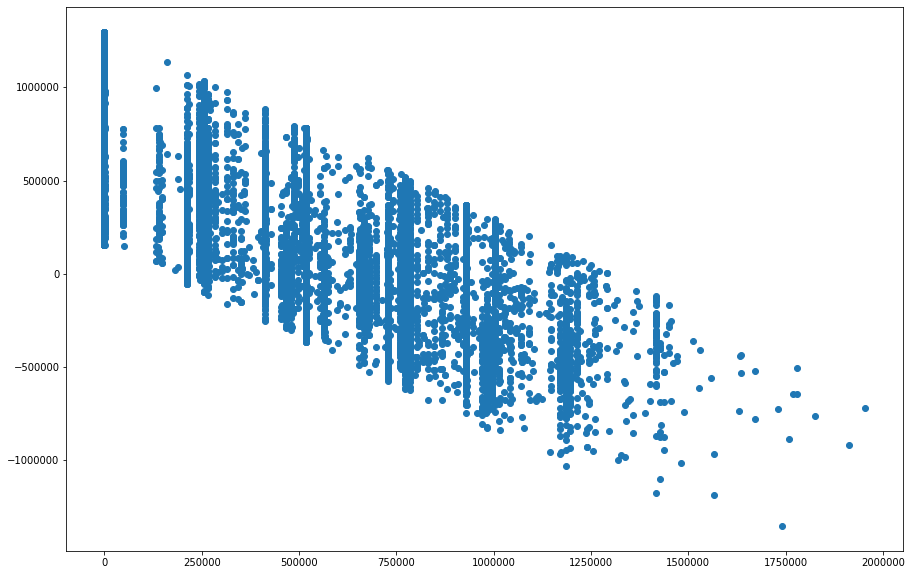

In [224]:
y_hat=model10.predict()
fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(y_hat, model10.resid)

The homoscedasticity assumption with this model is better than the previous ones but is still violating the assumption.

In [229]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [228]:
feature_df = model_df_encoded.drop(columns='SalePrice', axis=1)

In [232]:
rows = feature_df.values
vif_df = pd.DataFrame()
vif_df["VIF"] = [variance_inflation_factor(rows, i) for i in range(feature_df.shape[1])]
vif_df["feature"] = feature_df.columns
vif_df.VIF.mean()

0.6989291545047718

### The mean variation inflation factor of .7 is lower than 5, indicating we have met the independence assumption.